#  Uncertainty Quantification for Economists

# Table of Contents
1. [Introduction](#intro)
2. [Uncertainty Quantification in Economics](#uqe)
3. [Monte-Carlo Uncertainty Propagation: An Economic example](#mcup)
4. [Our Learning Interests](#oli)  
   [References](#references)

## Abbreviations

UQ - Uncertainty Quantification  
QoI - Quantity of Interest

## Introduction <a name="introduction"></a>

Uncertainty Quantification is a increasingly well-established toolkit in many applied sciences such as metereology, climatology, engineering, virology etc. Models to which the tools of UQ are applied are, amongst others, weather and climate models, nuclear reactor models and HIV models. Applied UQ aims to analyze the uncertainty of mathematical models that may come from various sources. The sources can be categorized in (i) model errors or discrepancies, (ii) input uncertainties, (iii) numerical errors and uncertainties and (iv) measurement errors and uncertainties. Once they are identified, the model can be improved. Given the magnitude of uncertainty in most models that are used to make - oftentimes tremendously important - decisions, Uncertainty Quantification should be part of every serious applied, model-based research and practice.

Usually, the second source of uncertainty, input uncertainties, is the main objective for an applied UQ. The reasons are first, that the tools to identify the model uncertainty that is propagated by the input paramters are relatively accessible and second, that this uncertainaty is oftentimes hard to resolve and thus should at least be reported. The following shows the steps to be taken when applying UQ to some model.

## <center> Figure 1: UQ framework </center>
<img src="_notebook_material/uq_framework.png" width="66%" align="center"/>

In Step A, the computational model $M$ is defined. This requires to identify input parameters and output QoIs.  
In Step B, the uncertainty in the input paramters is described by a joint PDF that best represents the available information.  
In Step C, uncertainty propagation is carried out so as to analyze the moments and distributions of the QoI, for instance by plotting histograms.  
Finally, in Step C', sensitivity analysis is carried out to rank the input parameters according to their impact onto the predicition uncertainty, or to identify the direction of change of that impact. The acquired knowledge can be used to focus a more detailed analysis on a subset of the input variables.  
Resulting from the first analysis round, the model and its parameter composition might be changed. Then the process might be repeated.

A important decision when executing an UQ is whether to use Monte Carlo simulation (MCS) or a surrogate model that serves as an easy-to-evaluate approximation of the model that returns the QoI.
The reason that one might want to choose the second option is that computationally expensive models slow down MCS methods even more - given their naturally slow convergence.

The below figure depicts the model-based predictive estimation process in the light of a fully-fledged Uncertainty Quantification. It regards all four sources of model uncertainty as well as the need for additional advanced mathematical methods to use surrogate models.

## <center> Figure 2: Components of predictive estimation with UQ </center>
<img src="_notebook_material/uq_flowchart.png" width="66%" align="center"/>

As also highlighted by the first figure, Model Calibration and Uncertainty Propagation are the driving objectives.
Local Sensitity analysis in contrast to global sensitivity analysis aims at quantifying the effect of a subset of paramters on the QoI - but only for evaluations at a subset of the domain. The remaining topics are required to achieve these objectives for large-scale applications.
Stochastic Spectral Methods, e.g. Stochastic Galerkin, collocation or discrete projection mehtods provide options for computing surrogate models. Sparse grid methods are requred to implement stochastic spectral methods and for direct implementation of Bayesian model calibation methods when paramter dimensions are moderate.

## Uncertainty Quantification in Economics
A part of the economic literature is well aware of the need for uncertainty quantification. However, with few exceptions (e.g. [Harenberg et al. (2019)](https://onlinelibrary.wiley.com/doi/abs/10.3982/QE866), this need is not adressed in practice.  
In modern economics, we use dynamic economic models to formalize the objectives, trade-offs, and uncertainties faced by individuals when making optimal decisions. A illustrative example for the need of UQ in Economics are Utility Functions. These are the most basic functions that usually characterize the behavior and preferences of the agents that populate our models. Utility is a function of a set of parameters such as risk aversion or time preference. These parameters are highly uncertain given the current state of the respective microeconometric literature. Without Uncertainty Quantification being a standard in economics, it is current practice to simply select a parameter value that another autor has selected before. Therefore, estimations and forecasts are typically derived based on models with input paramters that are more or less chosen arbitrarily.  
Our interest is to make a contribution to our profession by applying state-of-the-art tools from Uncertainty Quantification to our economic models in our research practice.

## Monte-Carlo Uncertainty Propagation: An Economic example <a name="mcup"></a>

Our model of choice is the Discrete Occupation Choice Dynamic Programming Model in Keane and Wolpin (1994). In short, the model is solved by applying Maximum Likelihood estimations to a set of occupational choices in each iteration of the Value Function Iteration algorithm. The number of input parameters is 26 and we have estimates for mean and covariance for each of those input parameters.

The following code propagates the uncertainty from the model's input parameter to one model output. Our QoI is the effect of a tuition subsidy on the average number of schooling years. We plot the Convergence of the Mean of our Quantity of Interest compared to our Quantity of Interest under mean paramtrization for 10k iterations. We also show the distribution of the QoI.

In [1]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import respy as rp

from python.mc_uncertainty_propagation import *
from python.model_wrapper import model_wrapper_kw_94
from python.cov_matrix import create_cov_matrix
from python.distplot import distplot
from python.convergence_plot import convergence_plot

In [2]:
params, options = rp.get_example_model("kw_94_one", with_data=False)

In [3]:
params

value  \
category            name                                  
delta               delta                        0.9500   
wage_a              constant                     9.2100   
                    exp_edu                      0.0380   
                    exp_a                        0.0330   
                    exp_a_square                -0.0005   
                    exp_b                        0.0000   
                    exp_b_square                 0.0000   
wage_b              constant                     8.4800   
                    exp_edu                      0.0700   
                    exp_b                        0.0670   
                    exp_b_square                -0.0010   
                    exp_a                        0.0220   
                    exp_a_square                -0.0005   
nonpec_edu          constant                     0.0000   
                    at_least_twelve_exp_edu      0.0000   
                    not_edu_last_period      -4000.0000   
nonpec_home         constant                 17750.0000   
shocks_sdcorr       sd_a                         0.2000   
                    sd_b                         0.2500   
                    sd_edu                    1500.0000   
                    sd_home                   1500.0000   
                    corr_b_a                     0.0000   
                    corr_edu_a                   0.0000   
                    corr_edu_b                   0.0000   
                    corr_home_a                  0.0000   
                    corr_home_b                  0.0000   
                    corr_home_edu                0.0000   
meas_error          sd_a                         1.0000   
                    sd_b                         1.0000   
lagged_choice_1_edu edu_ten                      1.0000   
initial_exp_edu     10                           1.0000   
maximum_exp         edu                         20.0000   

                                                                                       comment  
category            name                                                                        
delta               delta                                                      discount factor  
wage_a              constant                                               log of rental price  
                    exp_edu                          return to an additional year of schooling  
                    exp_a                                     return to same sector experience  
                    exp_a_square                   return to same sector, quadratic experience  
                    exp_b                                    return to other sector experience  
                    exp_b_square                  return to other sector, quadratic experience  
wage_b              constant                                               log of rental price  
                    exp_edu                          return to an additional year of schooling  
                    exp_b                                     return to same sector experience  
                    exp_b_square                   return to same sector, quadratic experience  
                    exp_a                                    return to other sector experience  
                    exp_a_square                  return to other sector, quadratic experience  
nonpec_edu          constant                            constant reward for choosing education  
                    at_least_twelve_exp_edu        reward for going to college (tuition, etc.)  
                    not_edu_last_period                        reward for going back to school  
nonpec_home         constant                         constant reward of non-market alternative  
shocks_sdcorr       sd_a                     Element 1,1 of standard-deviation/correlation ...  
                    sd_b                     Element 2,2 of standard-deviation/correlation ...  
      

In [4]:
len(params["value"])

32

In [5]:
# read and label mean input paramters from table in KW97
df = pd.read_csv("csv/table41_kw_94.csv", sep=",")
params_csv_temp = pd.Series(data=df["true"].values, index=df["parameter"].values)

# transform them to respy format that is slightly different
params_csv_rp = transform_params_kw94_respy(params_csv_temp)

# compute the qoi under mean parametrization
qoi_mean_params = model_wrapper_kw_94(params_csv_rp.to_numpy(), 500)[0] - model_wrapper_kw_94(params_csv_rp.to_numpy(), 0)[0]

# init covariance matrix based on table in KW97
cov_df = create_cov_matrix()

# possible live Uncertainty Propagation with low run time

#mean_params = pd.Series(data=df["true"].values, index=df["parameter"].values)
#qoi, rp_param_draws = mc_uncertainty_propagation(mean_params, cov_df, 10, save=False)

# Init data for Uncertainty Propagation with larger run time
with open('json/qoi.json') as json_file:
    qoi_json = json.load(json_file)

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

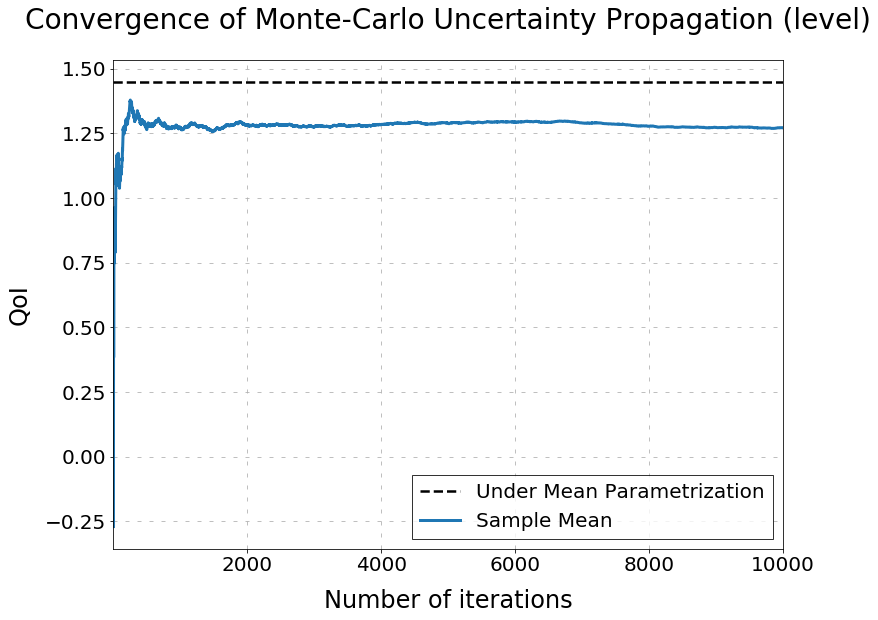

In [6]:
convergence_plot(qoi_json, qoi_mean_params, "QoI")

<module 'matplotlib.pyplot' from 'C:\\Users\\Tobias\\AppData\\Local\\conda\\conda\\envs\\uq\\lib\\site-packages\\matplotlib\\pyplot.py'>

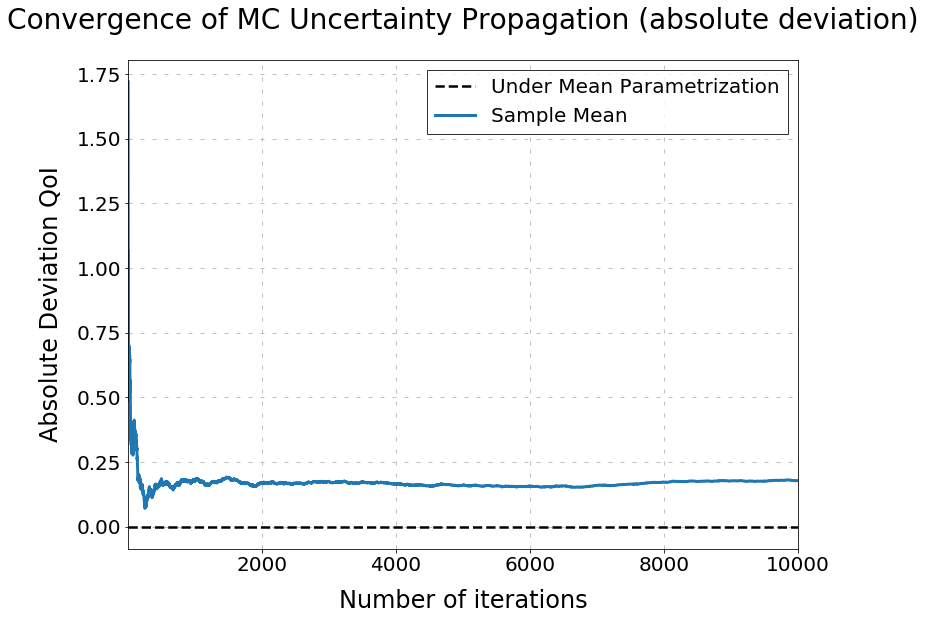

In [7]:
convergence_plot(qoi_json, qoi_mean_params, "Absolute Deviation QoI", absolute_deviation=True)

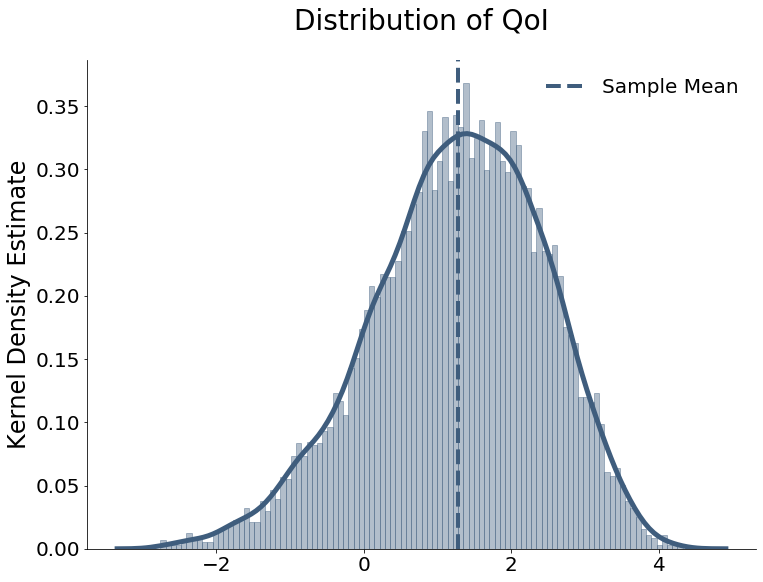

In [8]:
distplot(qoi_json, 'QoI')

## Our Learning Interests <a name="oli"></a>

We are especially interested in your opinion on the following questions:
- What - in general - are the "best" measures for Parameter Uncertainty and its analysis?
- What could be good rules to decide whether to use Monte Carlo or a surrogate model?
- What are the "best" numerical methods to compute a surrogate model and UQ measures based on it?

## References <a name="references"></a>

Feinberg, J., Langtagen, H. P. (2015) ["Chaospy: An open source tool for designing methods of uncertainty quantification"](https://www.sciencedirect.com/science/article/pii/S1877750315300119), Journal of Computational Science, 11: pp. 46-57.

Harenberg, D., Marelli, S., Sudret B., Winschel V. (2019). ["Uncertainty quantification and global sensitivity analysis for economic models"](https://onlinelibrary.wiley.com/doi/abs/10.3982/QE866), Quantitative Economics, 10(1): 1-41.

Keane, M. P. & Wolpin, W. I. (1994). ["The Solution and Estimation of Discrete Choice Dynamic Pogramming Models by Simulation and Interpolation: Monte Carlo Evidence"](http://research.economics.unsw.edu.au/mkeane/Solution_Estimation_DP.pdf), Review of Economics and Statistics, 76(4): pp. 648-672.

Keane, M. P. and Wolpin, K. I. (1997). ["The Career Decisions of Young Men"](https://www.jstor.org/stable/pdf/10.1086/262080.pdf?refreqid=excelsior%3A4e16df222bafe665c89727fac7aad557&seq=1#page_scan_tab_contents). Journal of Political Economy, 105(3): pp. 473-522.

Smith, R. C. (2013). [Uncertainty Quantification: Theory, Implementation, and Applications](https://my.siam.org/Store/Product/viewproduct/?ProductId=24973024). SIAM. Philadelphia, Pennsylvania.

Sullivan, T. J. (2015). [Introduction to uncertainty quantification](https://www.semanticscholar.org/paper/Introduction-to-uncertainty-quantification-Sullivan/733938adeeb70a5a1463d64c1447397d926bb64b). Springer, Heidelberg.